ОПИСАНИЕ НАБОРА ДАННЫХ

Данные описывают основные параметры групп скважин месторождения X на момент 2022 года Западной Сибири
Система ППД (Поддержание Пластового Давления) представляет собой группу нагнетательных скважин, которые закачивают воду в нефтяное месторождения. Применяется данная технология на последней IV стадии разработки месторождения для поддержания давления внутри породы коллектора (породы, вмещающей нефть). За счет повышенного давления и поршневого вытеснения водой нефти удается снижать темпы падения добычи.

Однако существует множество осложняющих добычу факторов. Одним из них является всегда меняющиеся параметры горной породы и системы вытеснения. Так, например, вода обладет более высокой подвижностью в сравнении с нефтью из за чего часто просисходит ситуация прорыва фронта вытеснения к скважине. Как результат, вместо нефти скважины добывают воду и рентабельность и эксплуатации падает.

Ключевые параметры, по которым оценивают работу группы скважин и эффективность системы ППД это обводненность, газосодержание, дебит жидкости(смеси воды и нефти), закачка воды. Зависимость газосодержания и добычи газа соответственно зависят от обводненности продукции. Так, если содержание воды в жидкости велико, то сожержание нефти падает. Единственным компонентом, способным содержать в себе газ в растворенном виде это нефть. Соответственно чем выше обводненность, тем ниже добыча газа.

За основу оценки системы ППД, был взят ряд исследований, показывающих следующую зависимость, где прямая линия-диагональ указывает идеальный режим вытеснения (сколько воды закачали, столько жидкости добыли). Отклонение выше указывает на отток закачиваемой воды в пустотное пространство в месторождении. Отклонение ниже - о притоке воды из-за котнура. Однако говорить однозначно о причинах и последствиях данного режима трудно имея лишь два параметра. Было принято решение связать ту или иную проблему с параметром добычи газа. На наш взгляд наиболее точно указать на проблему и ее последствия для скважины способен данный метод в совокупности с анализом параметра добычи газа.

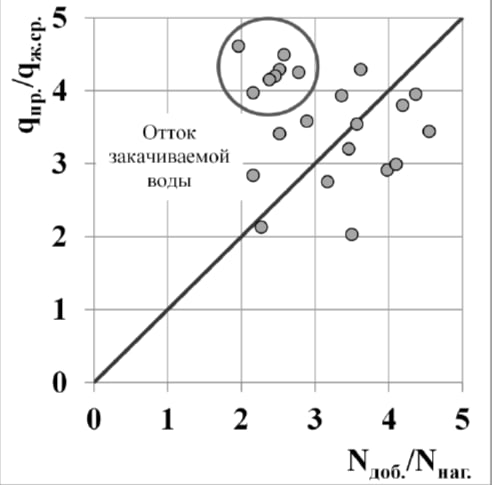

Признак  | Описание
-------------------|--------------------
Number       | Номер группы скважин
Ninj/Nprod      | Отношение количества нагнетательных скважин к количеству добывающих
Qinj/Qprod       | Отношение закачки воды в продуктивный пласт за сутки к добыче жидкости
Gas      | Суточная добыча газа на объекте разработки



Импортируем библиотеки

In [1]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


Загрузим данные в датафрейм

In [3]:
df = pd.read_csv("Данные по группам скважин.csv", sep = ";", index_col = 0, header = 0, decimal = ",")
df

,Nprod/Ninj,Qinj/Qprod,Gas
Number,,,
1,0.133,0.150,0.94
2,0.100,0.170,0.94
3,0.063,0.110,0.94
4,0.093,0.460,0.94
5,0.069,1.200,0.94
6,0.063,0.090,0.94
7,0.063,0.220,0.94
8,0.063,0.100,0.94
9,0.036,0.270,0.94


Окинем взглядом основные статистики, посчитанные по данному набору данных.

In [ ]:
df.describe()

,Nprod/Ninj,Qinj/Qprod,Gas
count,56.000000,56.000000,56.000000
mean,0.090357,0.298375,0.487500
std,0.041499,0.274147,0.479849
min,0.018000,0.014000,0.040000
25%,0.063000,0.157500,0.060000
50%,0.076500,0.225000,0.060000
75%,0.121250,0.371750,0.940000
max,0.200000,1.590000,1.270000


<Axes: >

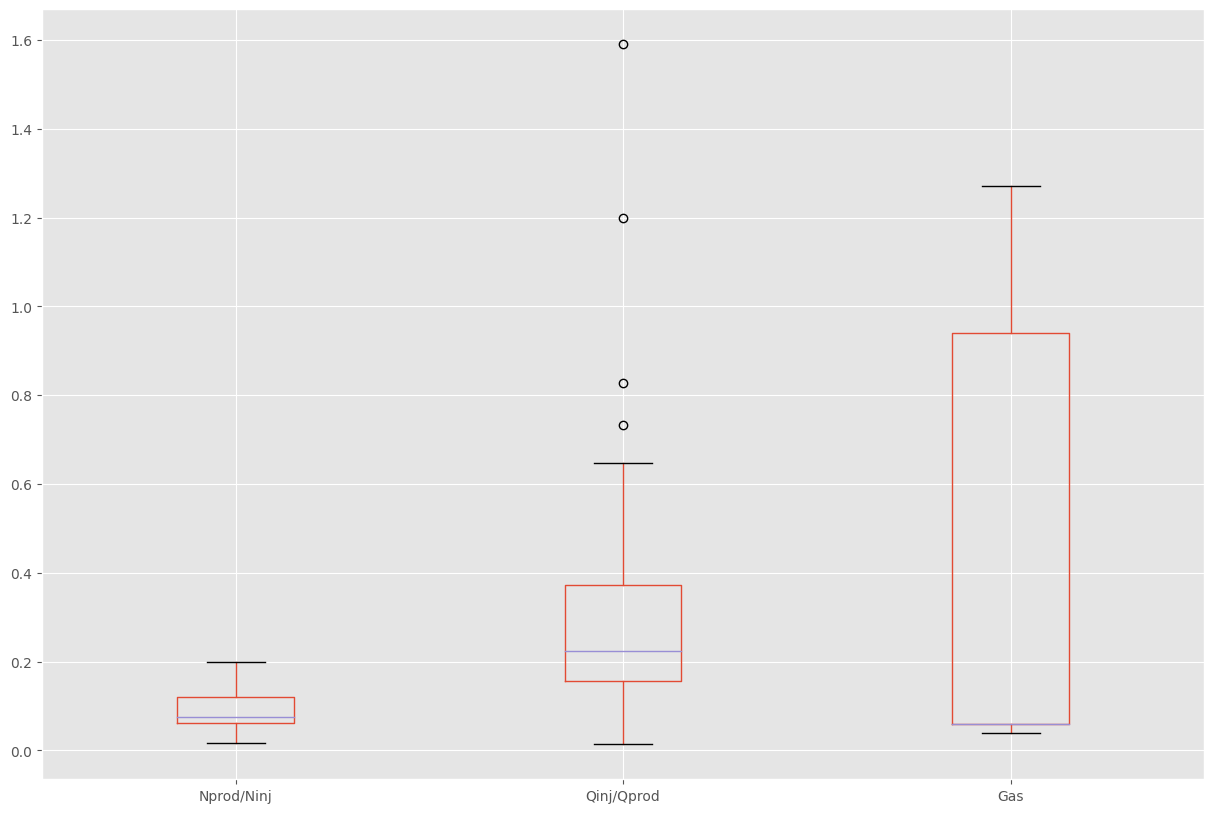

In [ ]:
df.boxplot(figsize=(15,10))

Видно, что в столбце `Qinj/Qprod`  есть аномальные значения, равные $1,59$. Это типичные значения, возникающие в случаях, когда оценка взаимодействия скважин может быть ошибочно.

Для того чтобы проверить, что мы ничего не упустили, давайте посмотрим на ящики с усами (boxplot).

Удалим выбросы методом IQR, так же удалим нереалистичные значения

In [ ]:
num_features = df.select_dtypes(include=['int', 'float']).columns.to_list()
cat_features = df.select_dtypes(include=['object', 'category']).columns.to_list()
features = num_features + cat_features
target = 'weather_type'

def drop_outliers(df):
    df1 = df.copy()
    for col in num_features:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        df1 = df1[df1[col] > (Q1 - 1.5 * IQR)]
        df1 = df1[df1[col] < (Q3 + 1.5 * IQR)]
    return df1

print(df.shape)
df = drop_outliers(df)
print(df.shape)

(56, 3)
(52, 3)


<Axes: >

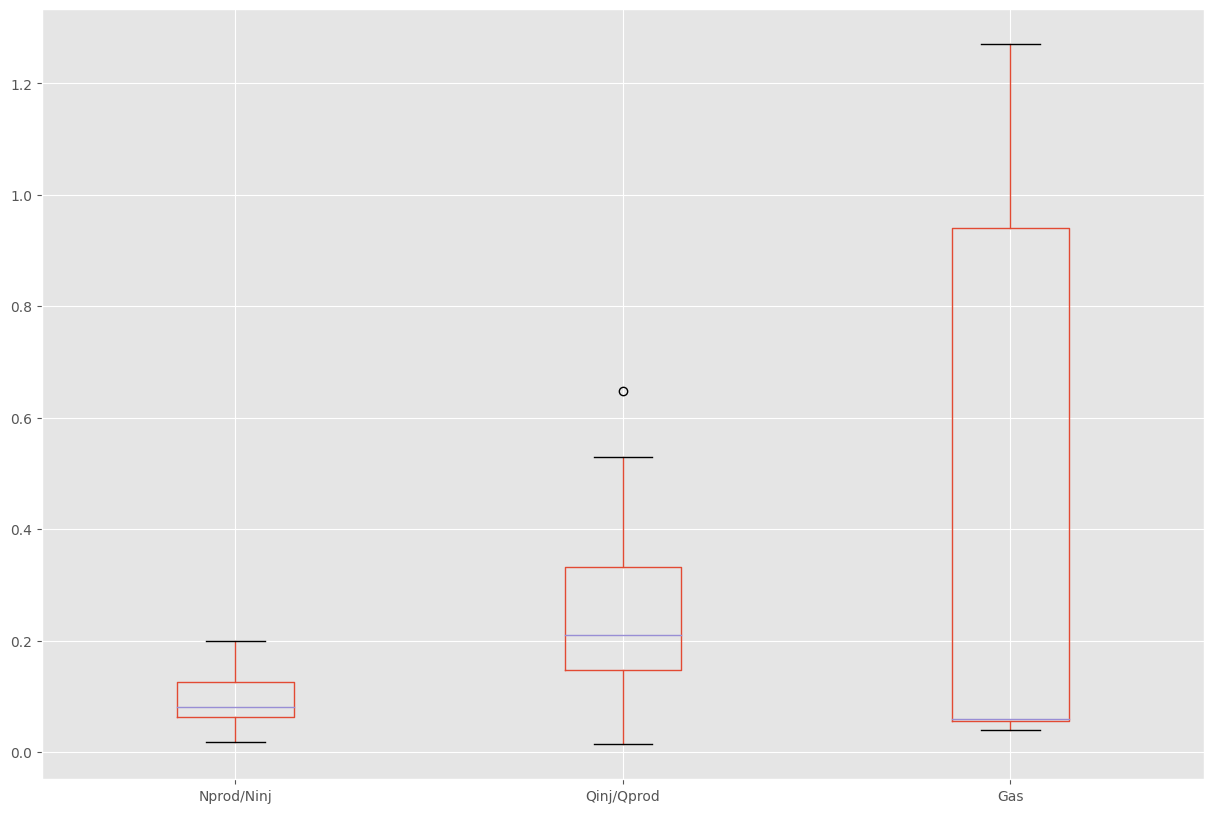

In [ ]:
df.boxplot(figsize=(15,10))

<Axes: >

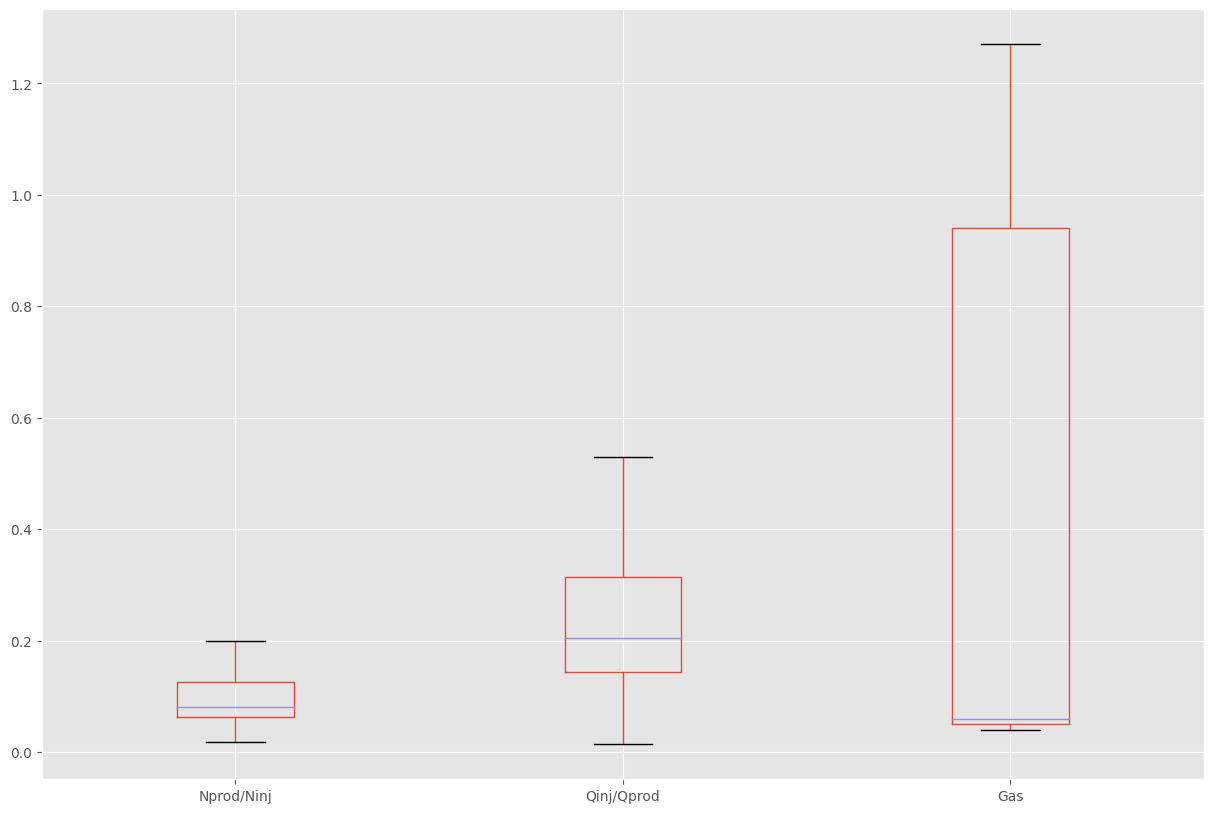

In [ ]:
clean_df = df[df['Qinj/Qprod'] != 0.647]
clean_df.boxplot(figsize=(15,10))

Видно, что выбросы удалены. Этот же график показывает, что рассматриваемые числовые величины имеют разный порядок, а значит, без сомнений, перед началом обработки их нужно стандартизировать. Будем стандартизировать с помощью StandartScaler().

In [ ]:
standard_scaler = StandardScaler()
standard_df = pd.DataFrame(data = standard_scaler.fit_transform(clean_df), index = clean_df.index, columns = clean_df.columns)
standard_df

,Nprod/Ninj,Qinj/Qprod,Gas
Number,,,
1,0.975673,-0.627513,0.929145
2,0.199286,-0.469939,0.929145
3,-0.671208,-0.942660,0.929145
4,0.034598,1.814875,0.929145
6,-0.671208,-1.100233,0.929145
7,-0.671208,-0.076006,0.929145
8,-0.671208,-1.021446,0.929145
9,-1.306433,0.317927,0.929145
10,-0.671208,2.366381,0.929145


Снова взглянем на boxplot, чтобы убедиться, что теперь визуально все неплохо.

<Axes: >

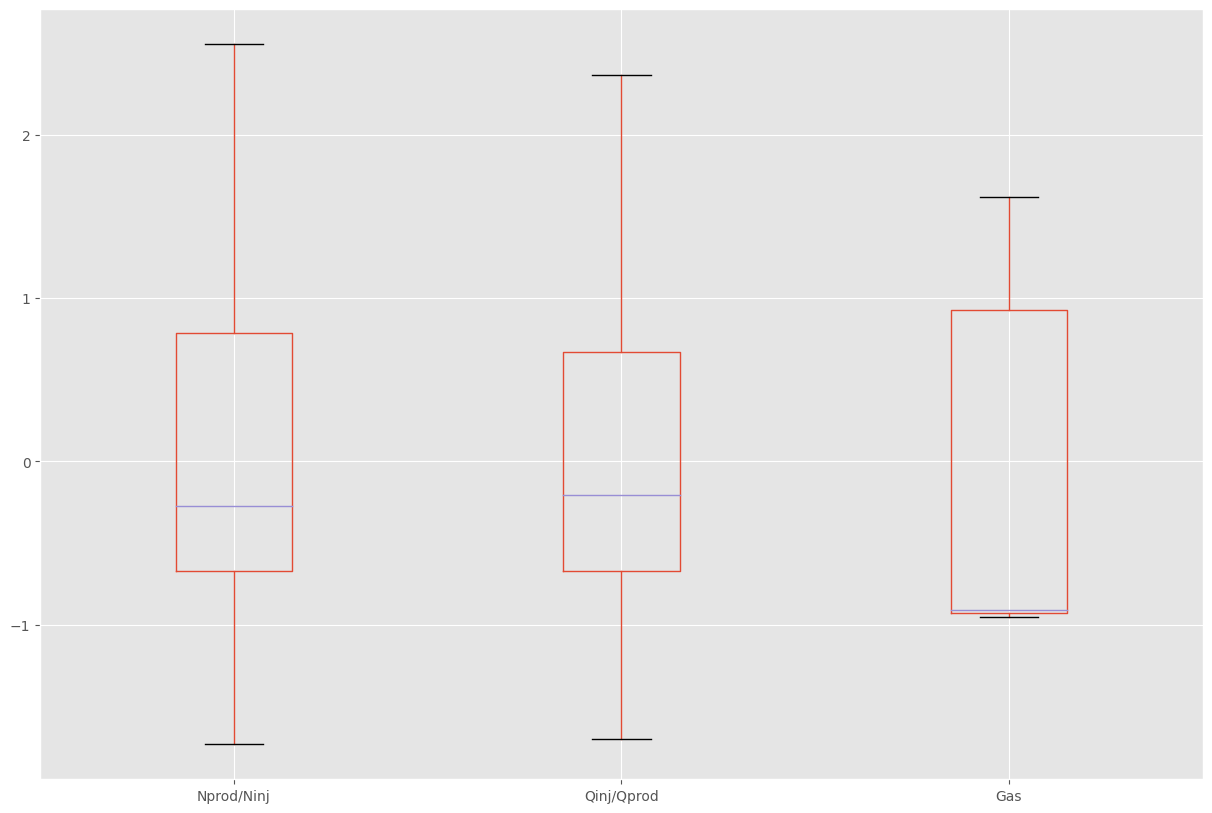

In [ ]:
standard_df.boxplot(figsize=(15,10))

Мы видим, что теперь все величины имеют одинаковый порядок

Теперь данные подготовленны и можно идти дальше.

# Постановка задачи и построение модели

Наша задача — выяснить, могут ли предложенные данные быть разбиты каким-то образом на группы (кластеризованы), и, в случае утвердительного ответа,  определить смысл полученных групп. В данном случае отношение велечин выбрано неслучайно.

Зная значения этих параметров, можно оценить насколько эффективно работает система поддержания пластового давления

Для проведения кластеризации будем использовать метод k-means. Попытаемся определить адекватное число кластеров (изучим диапазон от 1 до 10).

In [ ]:
final_df = clean_df.copy()

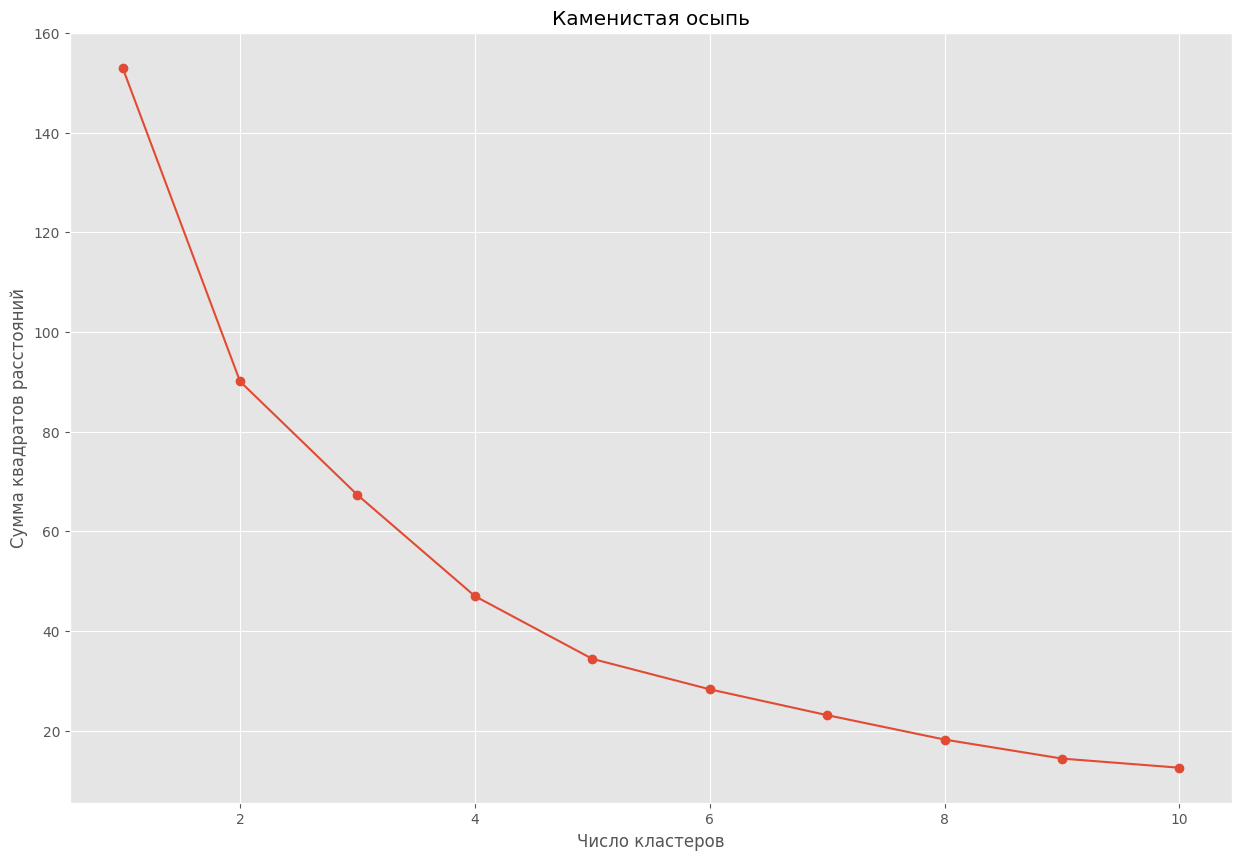

In [ ]:
K = range(1, 11)
models = [KMeans(n_clusters = k, random_state = 111, n_init = 100, max_iter = 10000).fit(standard_df) for k in K]
dist = [model.inertia_ for model in models]

plt.figure(figsize=(15,10))
plt.plot(K, dist, marker='o')
plt.xlabel('Число кластеров')
plt.ylabel('Сумма квадратов расстояний')
plt.title('Каменистая осыпь')
plt.show()

По графику видно, что имеет смысл рассмотреть диапазон от 4 до 8 кластеров. Далее излом не такой большой, а значит большее количество кластеров можно не брать в расчет.

Произведем кластеризацию для каждого случая и визуализируем полученные результаты.

            Nprod/Ninj  Qinj/Qprod       Gas
3_clusters                                  
0             0.065043    0.214826  0.997391
1             0.149182    0.334636  0.127273
2             0.090059    0.181765  0.052941


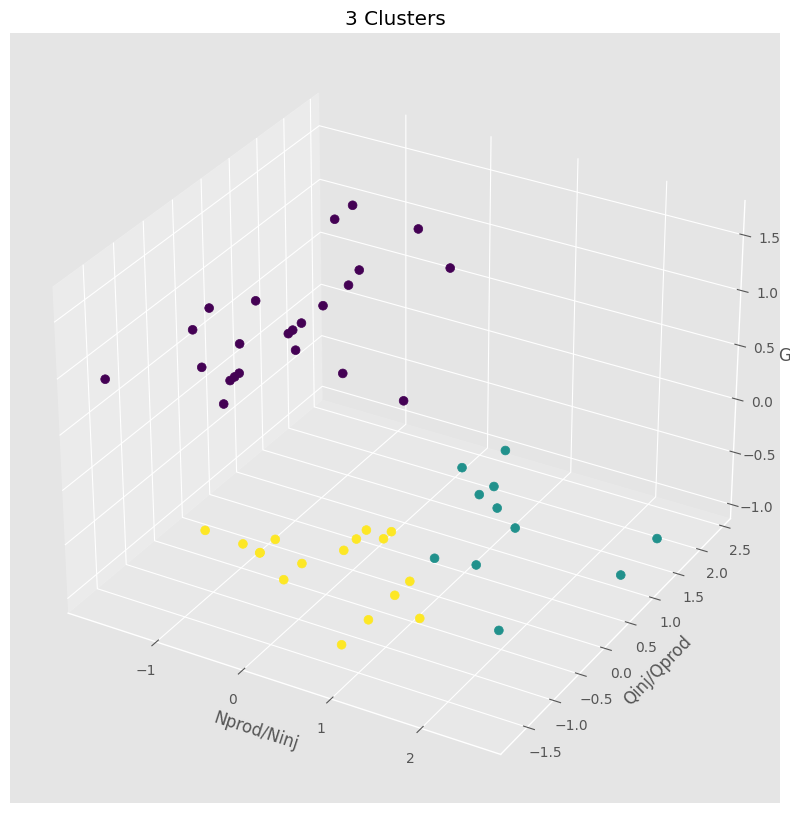

            Nprod/Ninj  Qinj/Qprod       Gas
4_clusters                                  
0             0.149182    0.334636  0.127273
1             0.090059    0.181765  0.052941
2             0.066357    0.119357  0.987143
3             0.063000    0.363333  1.013333


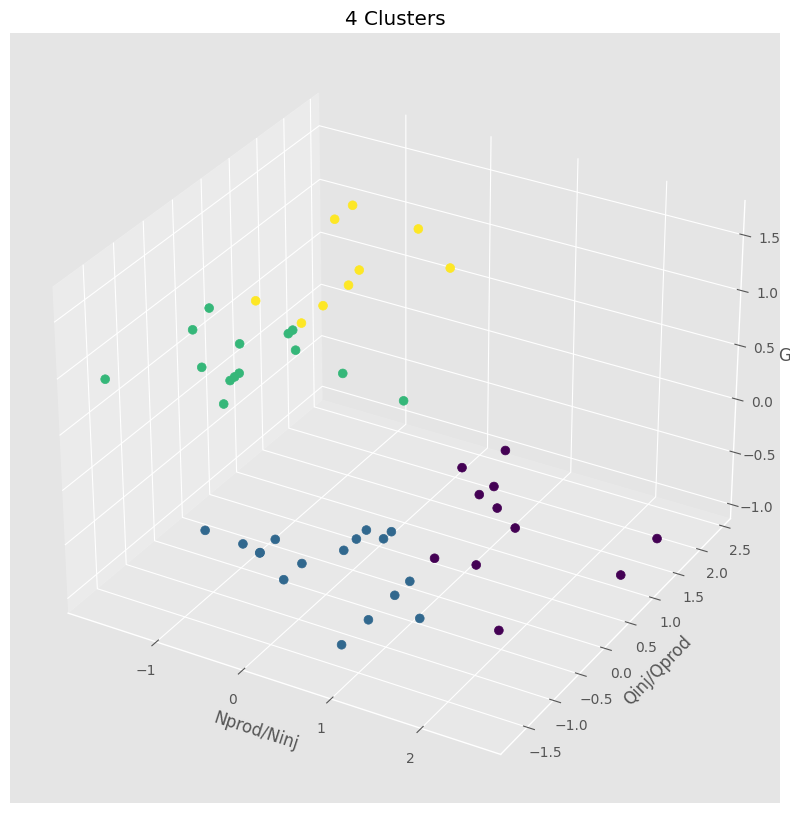

            Nprod/Ninj  Qinj/Qprod       Gas
5_clusters                                  
0             0.061231    0.117000  0.990769
1             0.141889    0.378667  0.046667
2             0.074000    0.202417  0.058333
3             0.063000    0.363333  1.013333
4             0.142500    0.135500  0.265000


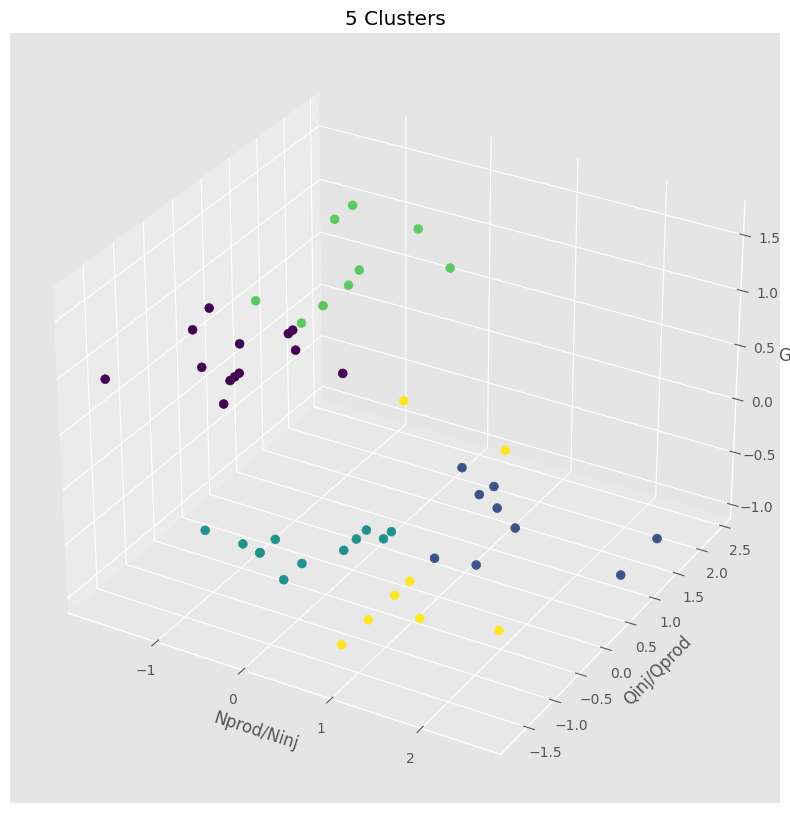

            Nprod/Ninj  Qinj/Qprod       Gas
6_clusters                                  
0             0.063000    0.363333  1.013333
1             0.135875    0.170500  0.040000
2             0.160500    0.130000  0.940000
3             0.074000    0.202417  0.058333
4             0.061231    0.117000  0.990769
5             0.144143    0.409714  0.048571


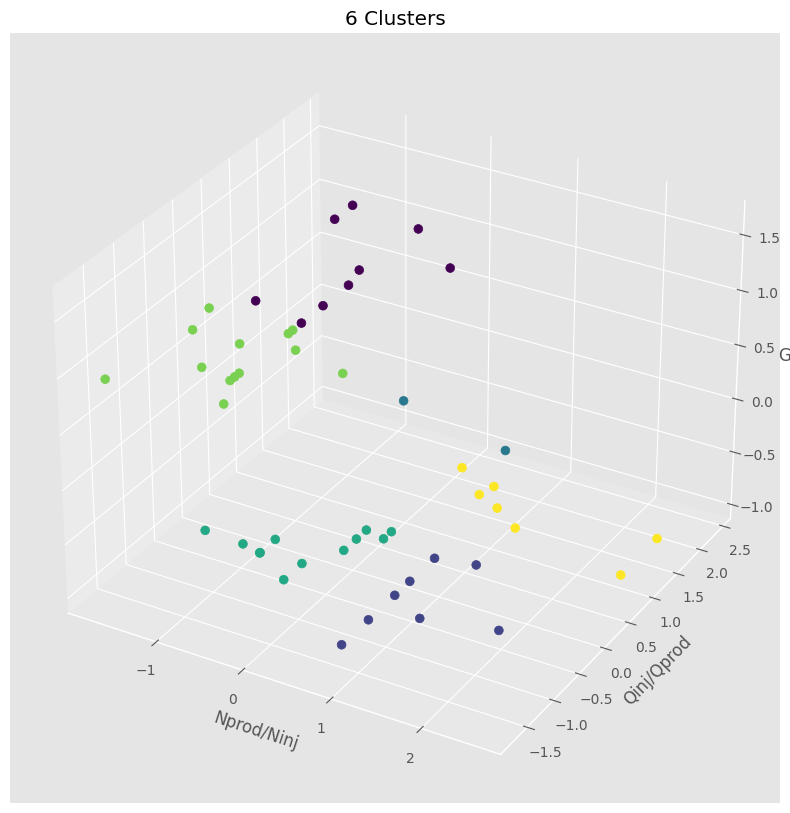

            Nprod/Ninj  Qinj/Qprod       Gas
7_clusters                                  
0             0.055875    0.067625  1.022500
1             0.135875    0.170500  0.040000
2             0.074000    0.202417  0.058333
3             0.144143    0.409714  0.048571
4             0.063875    0.225000  0.940000
5             0.067500    0.408333  1.050000
6             0.160500    0.130000  0.940000


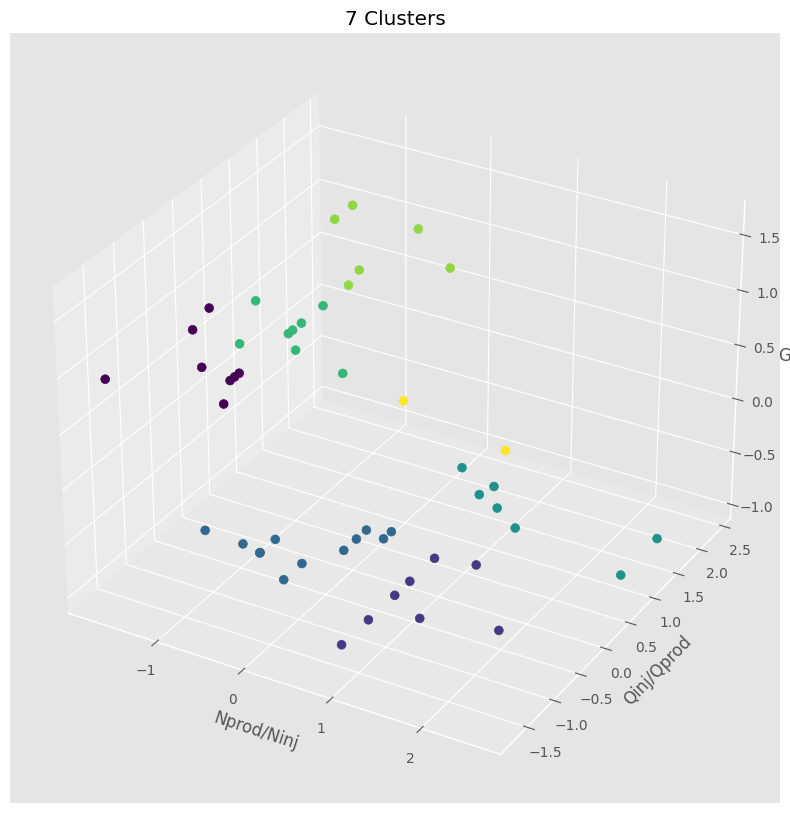

            Nprod/Ninj  Qinj/Qprod       Gas
8_clusters                                  
0             0.074000    0.202417  0.058333
1             0.063875    0.225000  0.940000
2             0.160500    0.130000  0.940000
3             0.200000    0.391000  0.040000
4             0.055875    0.067625  1.022500
5             0.135875    0.170500  0.040000
6             0.121800    0.417200  0.052000
7             0.067500    0.408333  1.050000


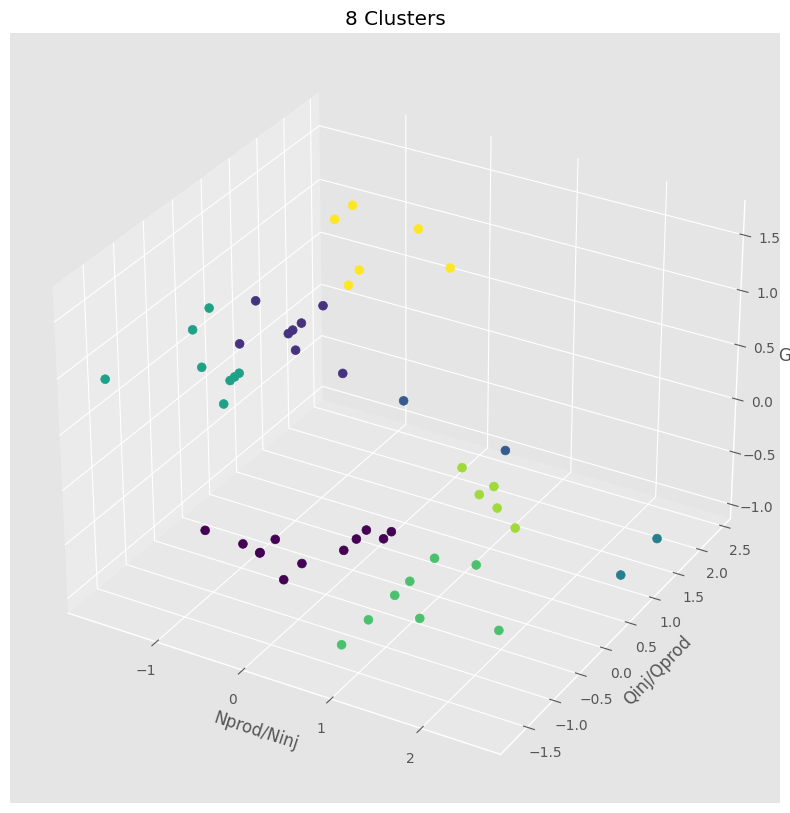

In [ ]:
for i in range(3, 9):
    model = KMeans(n_clusters=i, random_state=111, n_init=100, max_iter=10000)
    model.fit(standard_df)

    final_df[f'{i}_clusters'] = model.labels_

    print(final_df.groupby(f'{i}_clusters')[['Nprod/Ninj', 'Qinj/Qprod', 'Gas']].mean())

    fig = plt.figure(figsize=(15, 10))
    threedee = fig.add_subplot(111, projection='3d')
    threedee.scatter(standard_df["Nprod/Ninj"], standard_df["Qinj/Qprod"], standard_df["Gas"], c=final_df[f'{i}_clusters'], alpha=1, s=40)
    threedee.set_xlabel('Nprod/Ninj')
    threedee.set_ylabel('Qinj/Qprod')
    threedee.set_zlabel('Gas')
    threedee.set_title(f'{i} Clusters')
    plt.show()

По построенным моделям можно предположить, что разбиения на 3, 4, 8 кластеров являются наиболее удачными и интерпретируемыми. Более мелкое разбиение размывает четкие границы кластеров. Постараемся предложить интерпретацию для каждого из 3 вариантов.

# Оценка модели и результатов

Проведем финальную кластеризацию и интерпретируем результаты

Анализ основывается на теории, согласно которой при идеальном режиме работы системы ППД параметр Ninj/Nprod = Qinj/Qprod. Отклонения от него в большую или меньшую сторону могут сказать о причинах несостоятельности существующей системы и качеству продукции нефтяных скважин

In [ ]:
final_df.groupby('3_clusters')[['Nprod/Ninj', 'Qinj/Qprod', 'Gas']].mean()

,Nprod/Ninj,Qinj/Qprod,Gas
3_clusters,,,
0,0.065043,0.214826,0.997391
1,0.149182,0.334636,0.127273
2,0.090059,0.181765,0.052941


Все 3 группы скважин свидетельствуют о неэффективной работе системы заводнения, так как добывается жидкости большн, чем закачивается при условии что добывающих больше. Это свидетельствует о наличии притока жидкости в пустотное пространство, что требует дополнительных исследований
При разбиении на три кластера, интерпретация самая простая.
*   Нулевой кластер — Группа скважин с намболее сильным притоком жидкости но повышенной добычей газа. Возможно такое значение было достигнуто за счет прироста добычи по нефти пропорционально увеличению обводненности.
*   Первый кластер — Группа скважин со средним уровнем притока жидкости, добыча газа свидетельствует об относительно низкой обводненности.
*   Второй кластер — Из всех представленных вариантов наиболее близок к идеальному случаю работы ППД. разница между значениями минимально и добыча газа так же ниже остальных. Обводненность максимально, что может свидетельствовать о выработки продуктивного пласта.

Иными словами, все кластера имеют общую проблему: Приток жидкости в пласт, но разной степени отягощенности

In [ ]:
final_df.groupby('4_clusters')[['Nprod/Ninj', 'Qinj/Qprod', 'Gas']].mean()

,Nprod/Ninj,Qinj/Qprod,Gas
4_clusters,,,
0,0.149182,0.334636,0.127273
1,0.090059,0.181765,0.052941
2,0.066357,0.119357,0.987143
3,0.063000,0.363333,1.013333


При разбиении на 4 кластера, становится чуть труднее.
*   Кластер 0 совпал с кластером 1 из предыдущего случая
*   Кластер 1 совпал с кластером 2 из предыдущего случая

А кластер 0 из предыдущего случая разбился на два новых кластера:
*   Кластер 2 — наиболее близкий режим к идеальному случаю работы системы ППД с повышенным параметром добычи газа. Это свидетельствует о пониженной обводненности скважинной продукции.
*   Кластер 3 — Серьезный приток жидкости, скорее всего необходимо снизить напор воды.


In [ ]:
final_df.groupby('8_clusters')[['Nprod/Ninj', 'Qinj/Qprod', 'Gas']].mean()

,Nprod/Ninj,Qinj/Qprod,Gas
8_clusters,,,
0,0.074000,0.202417,0.058333
1,0.063875,0.225000,0.940000
2,0.160500,0.130000,0.940000
3,0.200000,0.391000,0.040000
4,0.055875,0.067625,1.022500
5,0.135875,0.170500,0.040000
6,0.121800,0.417200,0.052000
7,0.067500,0.408333,1.050000


При разбиении на 8 кластеров, становится еще сложнее.
*   Кластер 0 — Группа скважин страдает от притока жидкости при закачке, низкая добыча газа свидетельствует о повышенной обводненности продукции. В совокупности говорит о выработке продуктивных пластов и прорыве воды к скважине.
*   Кластер 1 — Группа скважин страдает от притока жидкости при закачке, высокая добыча газа свидетельствует о сниженной обводненности продукции. Продуктивный пласт еще не выработан имеет смысл изолировать зону притока
*   Кластер 2 — Группа скважин страдает от оттока жидкости при закачке воды. Иными словами, добываем меньше больше чем закачиваем. Высокий дебит по газу говорит о приросте в дебите жидкости без увеличения обводненности. В данный момент это не представляет угрозы, но в дальнейшем рекомендуется изолировать участок поглощения воды или повысить подачу воды. Группа близка к идеальному режиму работы
*   Кластер 3 — Режим работы группы скважин существенно отклоняется от идеального режима. Необходимо провести дополнительные исследования, так как приток жидкости в совокупности с падением добычи по газу говорит об увеличении обводненности продукции. Прогноз неблагоприятен
*   Кластер 4 — Режим идеального вытеснения, когда компенсация закачки близка к 90%. Вытеснение нефти из породы коллектора равномерно, добыча газа имеет максимально значение, что свидетельствует о наименьшем уровне обводненности жидкости. Нефтеотдача максимальна, режим благоприятен и не требует изменений.
*   Кластер 5 — Группа скважин близка к идеальному режиму, но страдает от притока жидкости. При наименьшем параметре добычи газа в совокупности фактов можно сделать вывод об увеличении дебита скважины. Изменение режимов работы скважин не приведет к изменениям. Необходимо изолировать зону притока воды
*   Кластер 6 — Самый неблагоприятный режим работы группы скважин. Среди всех наиболее отдален от идеального режима компенсации закачки. Колоссальные притоки законтурной воды в совокупности с низким дебитом по газу свидетельствуют о росте дебита и обводненности. Дальнейшая эксплуатация приведет к необходимости ликвидации скважин. Требуется дальнейшее исследование
*   Кластер 7 — Приток жидкости еще более интенсивный чем в 6 кластере, но большой параметр добычи газа указывает на снижение обводненности и повышенную нефтеотдачу. Скорее всего в процесс разработки вовлечены новые запасы нефти. Тем не менее, дальнейшая выработка горной породы приведет к окончательному обводнению дебита и ликвидации скважины. Необходимо изолировать зону притока, чтобы улучшить вытеснение нефти закачиваемой водой


Итак, по нашему мнению, имеет смысл выделить 4 или 8 кластеров. Оба варианта, в целом, хорошо интерпретируются и подходят для дальнейшего анализа. Увеличение количества кластеров позволяет детальнее рассмотреть возможные осложнения в системе ППД и более широко оценивает картину заводнения. 